In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#a)
with open('hw4_vocab.txt', 'r') as f:
    words = f.readlines()
    f.close()
with open('hw4_unigram.txt', 'r') as f:
    unigram_counts = f.readlines()
    f.close()
with open('hw4_bigram.txt', 'r') as f:
    bigram_counts = f.readlines()
    f.close()

In [3]:
int_unigram_ct = []
for i in range(len(unigram_counts)):
    int_unigram_ct.append(int(unigram_counts[i]))

In [4]:
return_list = []
for i in range(len(words)):
    if words[i][0] == 'M':
        return_list.append([words[i], int(unigram_counts[i]) / sum(int_unigram_ct)])

In [5]:
return_list

[['MILLION\n', 0.002072759168154815],
 ['MORE\n', 0.0017088989966186725],
 ['MR.\n', 0.0014416083492816956],
 ['MOST\n', 0.0007879173033190295],
 ['MARKET\n', 0.0007803712804681068],
 ['MAY\n', 0.0007298973156289532],
 ['M.\n', 0.0007034067394618568],
 ['MANY\n', 0.0006967290595970209],
 ['MADE\n', 0.0005598610827336895],
 ['MUCH\n', 0.0005145971758110562],
 ['MAKE\n', 0.0005144626437991272],
 ['MONTH\n', 0.00044490959363187093],
 ['MONEY\n', 0.00043710673693999306],
 ['MONTHS\n', 0.0004057607781605526],
 ['MY\n', 0.0004003183467688823],
 ['MONDAY\n', 0.00038198530259784006],
 ['MAJOR\n', 0.00037089252670515475],
 ['MILITARY\n', 0.00035204581485220204],
 ['MEMBERS\n', 0.00033606096579846475],
 ['MIGHT\n', 0.00027358919153183117],
 ['MEETING\n', 0.0002657374141083427],
 ['MUST\n', 0.0002665079156312084],
 ['ME\n', 0.00026357267173457725],
 ['MARCH\n', 0.0002597935452176646],
 ['MAN\n', 0.0002528834918776787],
 ['MS.\n', 0.0002389900041002911],
 ['MINISTER\n', 0.00023977273580605944],
 [

In [6]:
#b) 
for i in range(len(bigram_counts)):
    bigram_counts[i] = bigram_counts[i].split()
    for j in range(len(bigram_counts[i])):
        bigram_counts[i][j] = int(bigram_counts[i][j])

In [7]:
the_cond = []
for i in range(len(bigram_counts)):
    if bigram_counts[i][0] == 4:
        the_cond.append(bigram_counts[i])

In [8]:
probabilities = []
total_ct = 0
for i in range(len(the_cond)):
    total_ct += the_cond[i][2]

In [9]:
word_list = []
for i in range(len(the_cond)):
    probabilities.append(the_cond[i][2] / total_ct)
    word_list.append(words[the_cond[i][1] - 1])

In [10]:
word_list = pd.DataFrame(word_list)
word_list.columns = ['Words']
word_list['Probabilities'] = probabilities
word_list = word_list.sort_values(by='Probabilities', ascending=False).reset_index()
del word_list['index']

In [11]:
print(word_list[0:10])

          Words  Probabilities
0       <UNK>\n       0.615020
1          U.\n       0.013372
2       FIRST\n       0.011720
3     COMPANY\n       0.011659
4         NEW\n       0.009451
5      UNITED\n       0.008672
6  GOVERNMENT\n       0.006803
7    NINETEEN\n       0.006651
8        SAME\n       0.006287
9         TWO\n       0.006161


In [12]:
#c)
sentence = ['THE','STOCK','MARKET','FELL','BY','ONE','HUNDRED','POINTS','LAST','WEEK']
prob = 1
for i in range(len(sentence)):
    idx = words.index(sentence[i]+'\n')
    prob *= int(unigram_counts[idx]) / sum(int_unigram_ct)
lu = math.log(prob)

In [13]:
lu

-64.50944034364878

In [14]:
sentence_b = ['<s>', 'THE','STOCK','MARKET','FELL','BY','ONE','HUNDRED','POINTS','LAST','WEEK']
#pb = p(the|s)p(stock|the)p(market|stock)....p(week|last)
word_indices = []
for i in range(len(sentence_b)):
    word_indices.append(words.index(sentence_b[i]+'\n')+1)

In [15]:
prob_b = 1
for i in range(1, len(sentence_b)):
    total_count = 0
    idx_w1 = word_indices[i-1]
    idx_w2 = word_indices[i]
    for j in range(len(bigram_counts)):
        if(bigram_counts[j][0] == idx_w1):
            total_count += bigram_counts[j][2]
            if bigram_counts[j][1] == idx_w2:
                prob_num = bigram_counts[j][2]
    prob_b *= prob_num/total_count
lb = math.log(prob_b)

In [16]:
lb

-40.91813213378977

In [17]:
#d)
sentence_d_u = ['THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']
prob = 1
prob_arr = []
for i in range(len(sentence_d_u)):
    idx = words.index(sentence_d_u[i]+'\n')
    prob *= int(unigram_counts[idx]) / sum(int_unigram_ct)
    prob_arr.append(int(unigram_counts[idx]) / sum(int_unigram_ct))
lu = math.log(prob)

In [18]:
lu

-44.291934473132606

In [19]:
sentence_d_b = ['<s>','THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']
word_indices = []
prob_b_arr = []
for i in range(len(sentence_d_b)):
    word_indices.append(words.index(sentence_d_b[i]+'\n')+1)
prob_b = 1
for i in range(1, len(sentence_d_b)):
    total_count = 0
    prob_num = float('-inf')
    idx_w1 = word_indices[i-1]
    idx_w2 = word_indices[i]
    for j in range(len(bigram_counts)):
        if(bigram_counts[j][0] == idx_w1):
            total_count += bigram_counts[j][2]
            if bigram_counts[j][1] == idx_w2:
                prob_num = bigram_counts[j][2]
    prob_b *= prob_num/total_count
    prob_b_arr.append(prob_num / total_count)
lb = math.log(prob_b)

In [20]:
lb

inf

In [21]:
#e)
def mix_model(lamb):
    pm = 1
    for i in range(len(prob_arr)):
        if prob_b_arr[i] != float('-inf'):
            temp_pm = (lamb*prob_arr[i])+((1-lamb)*prob_b_arr[i])
        else:
            temp_pm = lamb*prob_arr[i]
        pm *= temp_pm
    return math.log(pm)

In [22]:
lambda_list = np.linspace(0.000000000001, 1, 1000)
log_list = []
for lamb in lambda_list:
    log_list.append(mix_model(lamb))

Text(0, 0.5, 'Log Likelihood')

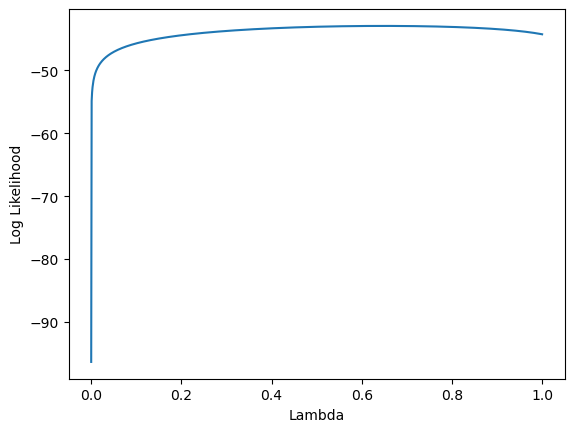

In [23]:
plt.plot(lambda_list, log_list)
plt.xlabel('Lambda')
plt.ylabel('Log Likelihood')

In [24]:
log_list = np.array(log_list)
log_list = np.argsort(log_list)
best_lambda = lambda_list[log_list[-1]]

In [25]:
best_lambda

0.647647647648

In [26]:
mix_model(best_lambda)

-42.964137594350596